## Fit a single-site model to an experiment and blank titration simultaneously
Fits binding of calcium onto EDTA. 

In [1]:
%matplotlib inline
import pytc

# Fit successful? True
# AIC: -106.66471175483758
# AICc: -105.44732045048976
# BIC: -91.03369063890904
# F: 639862.8061592504
# Rsq: 0.9999706195649023
# Rsq_adjusted: 0.9999690567758014
# ln(L): 59.33235587741879
# num_obs: 100
# num_param: 5
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,global_heat,NA,-4.81346e+02,4.61069e-04,float,0.00000e+00,-inf,inf
global,global_intercept,NA,-3.01160e-01,1.37159e-01,float,0.00000e+00,-inf,inf
local,K,ca-edta/tris-01.DH,3.93751e+07,3.15106e-06,float,1.00000e+06,-inf,inf
local,dH,ca-edta/tris-01.DH,-1.16161e+04,9.69669e-03,float,-4.00000e+03,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,9.74053e-01,2.72441e-02,float,1.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


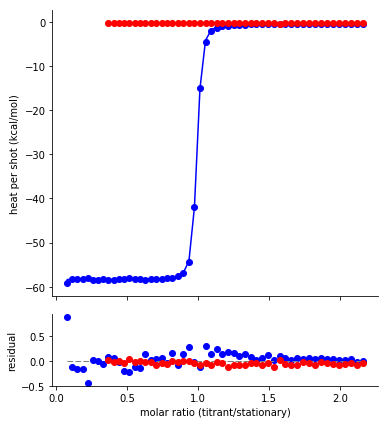

In [2]:
# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat and
# intercept to global parameters
g.add_experiment(a)
g.link_to_global(a,"dilution_heat","global_heat")
g.link_to_global(a,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Load in a blank titration
b = pytc.ITCExperiment("ca-edta/tris-blank.DH",pytc.indiv_models.Blank,shot_start=10)

# Add a blank titration to the fitter. Then link the dilution heat and
# intercept to global parameters
g.add_experiment(b)
g.link_to_global(b,"dilution_heat","global_heat")
g.link_to_global(b,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Do a global fit to the single-site and blank titrations
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)
